In [40]:
import pandas as pd
import numpy as np
import nltk
import re

In [41]:
df=pd.read_csv('employee_reviews.csv')

In [42]:
df.replace('none',np.NaN,inplace=True)

In [43]:
df.shape

(67529, 17)

In [44]:
df.head(3)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,NaN,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...


In [45]:
df.isna().sum()

Unnamed: 0                        0
company                           0
location                      25085
dates                             0
job-title                         0
summary                         129
pros                              0
cons                              1
advice-to-mgmt                29461
overall-ratings                   0
work-balance-stars             7160
culture-values-stars          13546
carrer-opportunities-stars     7108
comp-benefit-stars             7161
senior-mangemnet-stars         7775
helpful-count                     0
link                              0
dtype: int64

In [46]:
df.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

In [47]:
df.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [48]:
df['summary'].fillna('None',inplace=True)
df['advice-to-mgmt'].fillna('None',inplace=True)
df['cons'].fillna('None',inplace=True)

In [49]:
review_date=[]
for each_date in df['dates']:
    month=(each_date[:4])
    year=(each_date[-4:])
    date=month+' '+year
    review_date.append(date)


In [50]:
df['review_date']=review_date

In [51]:
df.drop(['Unnamed: 0','dates','work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars','link'],axis=1,inplace=True)

In [52]:
df['review_date'].nunique()

135

# EDA

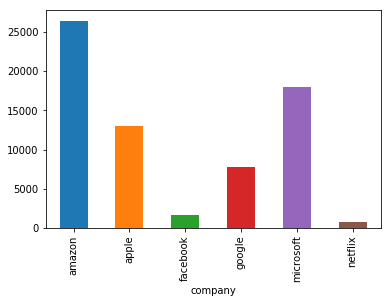

In [53]:
df.groupby('company')['overall-ratings'].count().plot(kind='bar')

company          amazon  apple  facebook  google  microsoft  netflix
overall-ratings                                                     
1.0                2461    484        47     155        639      120
2.0                2751    814        49     248       1308      112
3.0                5574   2266        98     763       3819      133
4.0                8091   4581       245    2275       7101      205
5.0                7553   4805      1151    4378       5063      240


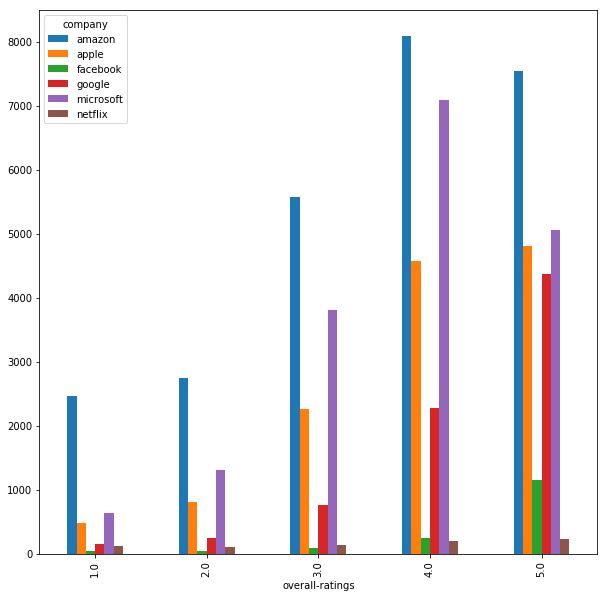

In [54]:
print(df.groupby(['overall-ratings','company'])['company'].size().unstack(level=1,fill_value=0))
df.groupby(['overall-ratings','company'])['company'].count().unstack().plot(kind='bar',figsize=(10,10))

In [55]:
current_employees_df=df[df['job-title'].str.startswith('C')]
former_employees_df=df[df['job-title'].str.startswith('F')]

# current employees rating to their companies

company          amazon  apple  facebook  google  microsoft  netflix
overall-ratings                                                     
1.0                1097    190        20      70        320       27
2.0                1436    385        26     114        686       40
3.0                3411   1208        54     396       2188       43
4.0                5689   2516       159    1273       4541      121
5.0                5976   2980      1020    2826       3554      174


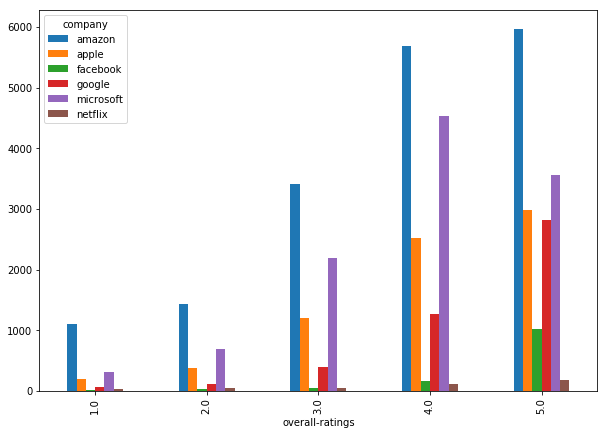

In [56]:
print(current_employees_df.groupby(['overall-ratings','company'])['company'].count().unstack(level=1,fill_value=0))
current_employees_df.groupby(['overall-ratings','company'])['company'].count().unstack().plot(kind='bar',figsize=(10,7))

In [57]:
df.head(5)

,company,location,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,helpful-count,review_date
0,google,NaN,Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,None,5.0,0,Dec 2018
1,google,"Mountain View, CA",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2094,Jun 2013
2,google,"New York, NY",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,949,May 2014
3,google,"Mountain View, CA",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,498,Feb 2015
4,google,"Los Angeles, CA",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,49,Jul 2018


In [58]:
positive_reviews_df=df.loc[df['overall-ratings']>3.0]
neutral_reviews_df=df.loc[df['overall-ratings']==3.0]
negative_reviews_df=df.loc[df['overall-ratings']<3.0]

In [59]:
cols=['summary','pros','cons']
positive_df=positive_reviews_df[cols]
neutral_df=neutral_reviews_df[cols]
negative_df=negative_reviews_df[cols]

In [60]:
positive_df['all_reviews']=positive_df['summary']+" "+positive_df['pros']+" "+positive_df['cons']
positive_df=positive_df['all_reviews']

neutral_df['all_reviews']=neutral_df['summary']+" "+neutral_df['pros']+" "+neutral_df['cons']
neutral_df=neutral_df['all_reviews']

negative_df['all_reviews']=negative_df['summary']+" "+negative_df['pros']+" "+negative_df['cons']
negative_df=negative_df['all_reviews']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [ ]:
import nltk
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
import re
stopwords=nltk.corpus.stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [64]:
positive_texts=positive_df.str.cat(sep='.')
neutral_texts=neutral_df.str.cat(sep='.')
negative_texts=negative_df.str.cat(sep='.')

In [39]:
def clean_text(text):
    text=re.sub(r"''","",text)
    text=re.sub(r"[0-9]",'',text)
    text=re.sub(r'[.!?:/)(*+~\"-,]','',text)
    tokens=word_tokenize(text)
    
    lemmatized_words=[lemmatizer.lemmatize(each_word) for each_word in tokens]
    lemmatized_words=[each_lem_word.lower() for each_lem_word in lemmatized_words]
    cleaned_words=[each_lem_word for each_lem_word in lemmatized_words if not each_lem_word in stopwords]
            
    return cleaned_words
clean_text(positive_texts)

AttributeError: 'TfidfVectorizer' object has no attribute 'shape'